<a href="https://colab.research.google.com/github/RichardRossJr/hello-world/blob/C%2B%2B-additions/Themis_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Themis-ml**

[**Themis-ml**](https://themis-ml.readthedocs.io/en/latest/index.html) is an open source Python machine learning library, and it builds on the **sklearn API, pandas, and sklearn.**  

The purpose of themis-ml is **measuring and reducing potential discrimination in machine learning systems**.

It provides a **fairness-aware machine learning interface (FMLI**), which defines an interface that incorporates discrimination discovery and fairness-aware methods into a typical ML workflow, that gives users with access to formalized definitions of fairness and discrimination described in the the machine learning and statistics literature.





## **Features**

Themis-ml provides some features to measure and reduce potential discrimination.



### **1.   Measuring Discrimination**


*    Mean difference
*   Normalized mean difference


### **2.   Mitigating Discrimination**


*   Preprocessing

> Relabelling (Massaging)


*   Model Estimation

> Additive Counterfactually Fair Estimator (Model)


*   Postprocessing


>  Reject Option Classification











### **Datasets**
There are two datasets provided in themis-ml. Here is a [link](https://themis-ml.readthedocs.io/en/latest/themis_ml.html#).


1.   German Credit Dataset
2.   Census Income Data from 1994 - 1995



## **Install themis-ml**

*Currently only **Python 2.7** and **3.6** are supported.*

There are two way to install themis-ml.

## conda
`conda install -c cosmicbboy themis-ml`


## pip
Before installing with pip, we need to install these three packages with either pip or conda.

1.   **scikit-learn** (Version requirement:>= 0.19.1)
2.   **numpy** (Version requirement:>= 1.9.0)
3.   **pandas** (Version requirement:>= 0.22.0)



`pip install themis-ml`

Here, we install themis-ml with pip.

In [ ]:
#installing scikit-learn, numpy, and pandas first
import pandas as pd
import numpy as np
import sklearn

In [ ]:
#pip
%pip install themis-ml


     |████████████████████████████████| 9.0MB 5.0MB/s 
  Created wheel for themis-ml: filename=themis_ml-0.0.4-cp37-none-any.whl size=9829352 sha256=a67ee176c6ffc2157b39c930b887aa0843e197b1d083fdd476bbf57254f91c0c
  Stored in directory: /root/.cache/pip/wheels/ef/39/e6/f455d5d6d97cbbe365a6b5a76d5c91b3f282962fef5da53173
Successfully built themis-ml


# **Example**

Example from themis-ml Github website: https://github.com/cosmicBboy/themis-ml/blob/master/examples/tutorial_fat*_2018.ipynb


Author: Niels Bantilan


Using the German Credit Dataset to demonstrate how to **measure potential discrimination** with the target variable credit risk and two sensitive attributes sex and foreigner.




# **Load Datasets**

[German Credit Dataset](https://archive.ics.uci.edu/ml/datasets/statlog+%28german+credit+data%29)

In [ ]:
from themis_ml.datasets import german_credit

raw_data = german_credit(raw=True)
raw_data.head()

,status_of_existing_checking_account,duration_in_month,credit_history,purpose,credit_amount,savings_account/bonds,present_employment_since,installment_rate_in_percentage_of_disposable_income,personal_status_and_sex,other_debtors/guarantors,present_residence_since,property,age_in_years,other_installment_plans,housing,number_of_existing_credits_at_this_bank,job,number_of_people_being_liable_to_provide_maintenance_for,telephone,foreign_worker,credit_risk
0,1,6,critical_account/other_credits_existing_not_at...,radio/television,1169,0,4,4,male_single,none,4,real_estate,67,none,own,2,2,1,1,1,1
1,2,48,existing_credits_paid_back_duly_till_now,radio/television,5951,1,2,2,female_divorced/separated/married,none,2,real_estate,22,none,own,1,2,1,0,1,0
2,0,12,critical_account/other_credits_existing_not_at...,education,2096,1,3,2,male_single,none,3,real_estate,49,none,own,1,1,2,0,1,1
3,1,42,existing_credits_paid_back_duly_till_now,furniture/equipment,7882,1,3,2,male_single,guarantor,4,building_society_savings_agreement/life_insurance,45,none,for free,1,2,2,0,1,1
4,1,24,delay_in_paying_off_in_the_past,car_(new),4870,1,2,3,male_single,none,4,unknown/no_property,53,none,for free,2,2,2,0,1,0


## **Measuring Potential Discrimination**
In this example, we use **mean difference** to measure potential discrimination with a binary target variable credit risk and two protected classes (sensitive attributes) sex and immigration status (foriegn worker).




> *Mean difference measures the absolute difference between the mean value in two different groups. In other words, it gives you an idea of how much difference there is between the averages of the experimental group and control groups.

Check out the website about what is the mean difference: https://www.statisticshowto.com/mean-difference/



In [ ]:
# target variable
# values: 1 = low credit risk, 0 = high credit risk
credit_risk = raw_data["credit_risk"]

# display frequency counts of each value
credit_risk.value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

In [ ]:
# get sex of the individual from the "personal_status_and_sex" column.
# values: 1 = female, 0 = male
sex = raw_data["personal_status_and_sex"].map(
    lambda x: {"male": 0, "female": 1}[x.split("_")[0]])

# display frequency counts of each value
sex.value_counts()

0    690
1    310
Name: personal_status_and_sex, dtype: int64

In [ ]:
# get foreign worker status: 1 = yes, 0 = no
foreign = raw_data["foreign_worker"]

# display frequency counts of each value
foreign.value_counts()

1    963
0     37
Name: foreign_worker, dtype: int64

## **Mean Difference**

**themis_ml.metrics.mean_difference(y, s)** [[source](https://themis-ml.readthedocs.io/en/latest/themis_ml.html#themis_ml.metrics.mean_difference): `def mean_difference(y, s)`]

It is for computing the mean difference in y (target variable) with respect to protected class s (sensitive attribute).




import mean difference first, use below code.

`from themis_ml.metrics import mean_difference`

In [ ]:
from themis_ml.metrics import mean_difference

print("Mean difference scores:")
print("protected class = sex: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      mean_difference(credit_risk, sex))
# 0.0748013090229
print("protected class = foreign: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      mean_difference(credit_risk, foreign))
# 0.199264685246

Mean difference scores:
protected class = sex: 0.075, 95% CI [0.013-0.136]
protected class = foreign: 0.199, 95% CI [0.049-0.349]


## **Normalized Mean Difference**

themis_ml.metrics.normalized_mean_difference(y, s, norm_y=None, ci=0.975)
[[source](https://themis-ml.readthedocs.io/en/latest/themis_ml.html#themis_ml.metrics.normalized_mean_difference): `def normalized_mean_difference(y, s, norm_y=None, ci=DEFAULT_CI)]`

It is to Compute normalized mean difference in y (target variable) with respect to s (sensitive attribute).

***How to calculate Normalized Mean Difference***

*   normalized_mean_difference = mean_difference / d_max
*   d_max = min( (p(y+) / p(s=0)), ((p(y-) / p(s=1)) )


Same the mean difference score, except the score takes into account the maximum possible discrimination at a given positive outcome rate. Is only defined when y and s are both binary variables.


import normalized mean difference first, use below code.

`from themis_ml.metrics import normalized_mean_difference`




In [ ]:
from themis_ml.metrics import normalized_mean_difference

print("\nNormalized mean difference scores:")
# normalized mean difference
print("protected class = sex: %s" %
      normalized_mean_difference(credit_risk, sex)[0])
# 0.0772946859903
print("protected class = foreign: %s" %
      normalized_mean_difference(credit_risk, foreign)[0])
# 0.63963963964


Normalized mean difference scores:
protected class = sex: 0.07729468599033808
protected class = foreign: 0.6396396396396394


In [ ]:
print("Mean difference scores:")
print("protected class = sex: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      mean_difference(credit_risk, sex))
# 0.0748013090229
print("protected class = foreign: %0.03f, 95%% CI [%0.03f-%0.03f]" %
      mean_difference(credit_risk, foreign))
# 0.199264685246

print("\nNormalized mean difference scores:")
# normalized mean difference
print("protected class = sex: %s" %
      normalized_mean_difference(credit_risk, sex)[0])
# 0.0772946859903
print("protected class = foreign: %s" %
      normalized_mean_difference(credit_risk, foreign)[0])
# 0.63963963964

Mean difference scores:
protected class = sex: 0.075, 95% CI [0.013-0.136]
protected class = foreign: 0.199, 95% CI [0.049-0.349]

Normalized mean difference scores:
protected class = sex: 0.07729468599033808
protected class = foreign: 0.6396396396396394


The mean differences above show that men and citizen workers are more possible to have low credit risks than women and foreign workers.

The themis-ml metrics functions compute confidence intervals by default, since it's important to come up with confidence bounds for our estimate of potential discrimination.

# **Mitigating Discrimination**

These two classifications can helps to reduce bias and discrimination.

# **Reject-Option Classification**

**Reject-Option Classification (ROC)** works by training an initial classifier on your dataset, generating predicted probabilities on the test set, and then computing the proximity of each prediction to the decision boundary learned by the classifier.



SingleROClassifier( BaseEstimator, ClassifierMixin, MetaEstimatorMixin):

[Source:https://github.com/cosmicBboy/themis-ml/blob/master/themis_ml/postprocessing/reject_option_classification.py]

[example format for using in the code: `SingleROClassifi (estimator=logistic_clf)`]

Importing Reject-Option Classification, using bewlow code:


`from themis_ml.postprocessing.reject_option_classification import \SingleROClassifier`

# **Additive Counterfactually Fair Model**
**Additive Counterfactually Fair Model** is using the protected class variable (Senstive attribute) to compute the residuals for each input variable and uses those residuals to learn a function that maps from inputs to the target variable.


class FairnessAwareMetaEstimator( BaseEstimator, ClassifierMixin, MetaEstimatorMixin):

[Source:https://github.com/cosmicBboy/themis-ml/blob/master/themis_ml/linear_model/counterfactually_fair_models.py]


[example format for using in the code: `LinearACFClassifier( target_estimator=logistic_clf, binary_residual_type="absolute")`]





Importing Reject-Option Classification, using bewlow code:


`from themis_ml.linear_model import LinearACFClassifier`

Here is an example, De-biasing Experiment, showing that Reject-Option Classification and Additive Counterfactually Fair Model can reduce discrimination. Also, how to interpret the result between base classifier(contain all variable) and ROC classifier and between base classifier(contain all variable) and ACF classifier.

## **De-biasing Experiment**
Author: Niels Bantilan.

In this experiment, we specify three conditions, all using LogisticRegression as the classifier to keep things simple:

1. Baseline ($B$): classifier trained on all available input variables, including protected attributes.
2. Remove Protected Attribute ($RPA$): classifier where input variables do not contain protected attributes. This is the naive fairness-aware approach.
3. Reject-Option Classification ($ROC$): classifier using the reject-option classification method.
4. Additive Counterfactually Fair Model ($ACF$): classifier using the additive counterfactually fair method.


The details about the de-biasing experiment: https://github.com/cosmicBboy/themis-ml/blob/master/examples/tutorial_fat*_2018.ipynb

Target variable: credit risk


Two protected classes (sensitive attributes): sex and immigration status (foriegn worker).

mean diff: mean different 

auc: Area under the curve (in ROC curve)

### **The De-biasing Experiment Result**

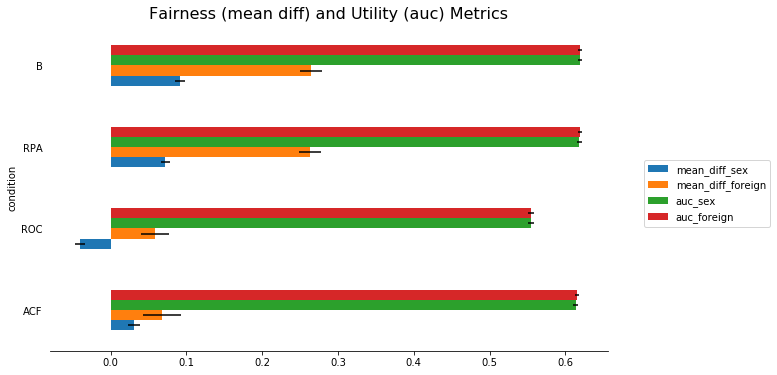

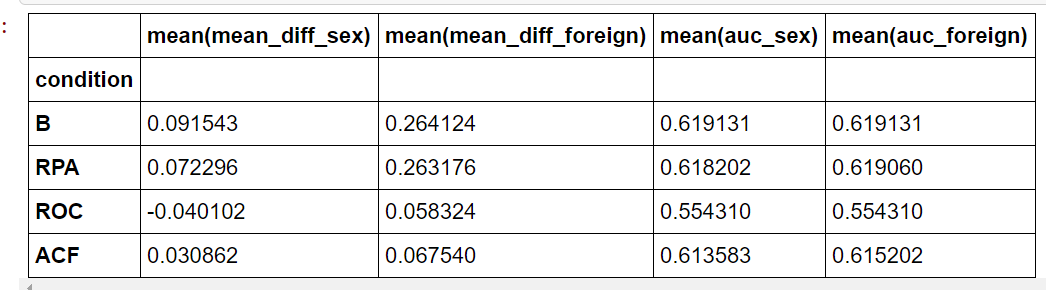

**Interpreting the results in the de-biasing experiment**

In the plot above, we can see a few things:


1. In the reject-option classification (ROC) condition, the mean difference for sex is less roughly 13% than the baseline (B), and the mean different for foreign is less roghly 20% than baseline (B). This means that the prediction made by ROC reduce potential discrimination, but the auc for sex is decreased 5%.




> In the case of ROC, it's possible to get a negative mean difference. Here, the mean difference get -4%, and it means that we're actually now slightly prefering women over than men.




2. In the additive counterfactually fair (ACF) model, the mean difference for sex is less roughly 6% than the baseline (B), and the mean difference for foreign is less 19% than the baseline (B). The mean for both attributes sex and foreign are maintained at 60%. The auc values for ACF is almost same with the baseline models.


Reject-Option Classification and Additive Counterfactually Fair Model can reduce potential discrimination in the predictions. However, the Reject-Option Classification would influence the auc values.

# **Reference**

Bantilan, N. (2017). A fairness-aware machine learning library — themis-ml 0.0.2 documentation. Themis-Ml. https://themis-ml.readthedocs.io/en/latest/index.html


C. (2018, July 31). cosmicBboy/themis-ml. GitHub. https://github.com/cosmicBboy/themis-ml



S. (2020, December 10). Mean Difference / Difference in Means (MD). Statistics How To. https://www.statisticshowto.com/mean-difference/